In [10]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [11]:
# load the dataset
training_df = pd.read_excel('drought_training_df.xlsx')

training_df.head()

,Water Potential (Mpa),339,341,342,344,345,346,348,349,351,...,2497,2499,2501,2503,2505,2507,2509,2511,2514,2516
0,-0.089632,0.1481,0.1818,0.1748,0.1486,0.1045,0.0782,0.0904,0.0830,0.1101,...,0.0344,0.0332,0.0347,0.0323,0.0308,0.0360,0.0346,0.0320,0.0328,0.0344
1,-0.148237,0.1422,0.1360,0.1384,0.1283,0.1103,0.0967,0.1014,0.1040,0.0934,...,0.0557,0.0560,0.0589,0.0560,0.0551,0.0563,0.0554,0.0533,0.0547,0.0528
2,-0.128243,0.0978,0.0920,0.1038,0.0981,0.0793,0.0613,0.0477,0.0520,0.0545,...,0.0314,0.0280,0.0252,0.0269,0.0275,0.0293,0.0311,0.0284,0.0279,0.0294
3,-0.164785,0.1422,0.1360,0.1538,0.1283,0.1241,0.1161,0.1074,0.0876,0.0831,...,0.0466,0.0456,0.0473,0.0484,0.0452,0.0428,0.0450,0.0486,0.0425,0.0479
4,-0.326122,0.1333,0.1280,0.1307,0.0981,0.1034,0.0838,0.0776,0.0767,0.0779,...,0.0375,0.0373,0.0347,0.0323,0.0330,0.0360,0.0369,0.0344,0.0340,0.0405


In [12]:
# ---------------------------------
# Define predictors and target
# ---------------------------------
predictors = training_df.drop(columns = ['Water Potential (Mpa)'])
target = training_df['Water Potential (Mpa)']

In [13]:
# --------------------------------
# Local Outlier Factor
# --------------------------------
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
predictors['Outlier_LOF'] = lof.fit_predict(predictors)

# --------------------------------
# Isolation Forest
# --------------------------------
iforest = IsolationForest(n_estimators=100, contamination=0.05)
predictors['Outlier_IForest'] = iforest.fit_predict(predictors)

# --------------------------------
# One-Class SVM
# --------------------------------
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
predictors['Outlier_OCSVM'] = ocsvm.fit_predict(predictors)

      339     341     342     344     345     346     348     349     351  \
0  0.1481  0.1818  0.1748  0.1486  0.1045  0.0782  0.0904  0.0830  0.1101   
1  0.1422  0.1360  0.1384  0.1283  0.1103  0.0967  0.1014  0.1040  0.0934   
2  0.0978  0.0920  0.1038  0.0981  0.0793  0.0613  0.0477  0.0520  0.0545   
3  0.1422  0.1360  0.1538  0.1283  0.1241  0.1161  0.1074  0.0876  0.0831   
4  0.1333  0.1280  0.1307  0.0981  0.1034  0.0838  0.0776  0.0767  0.0779   

      352  ...    2505    2507    2509    2511    2514    2516  Outlier_LOF  \
0  0.1168  ...  0.0308  0.0360  0.0346  0.0320  0.0328  0.0344            1   
1  0.0819  ...  0.0551  0.0563  0.0554  0.0533  0.0547  0.0528            1   
2  0.0698  ...  0.0275  0.0293  0.0311  0.0284  0.0279  0.0294            1   
3  0.0722  ...  0.0452  0.0428  0.0450  0.0486  0.0425  0.0479            1   
4  0.0722  ...  0.0330  0.0360  0.0369  0.0344  0.0340  0.0405            1   

   Outlier_IForest  Outlier_OCSVM  Outlier_Sum  
0            

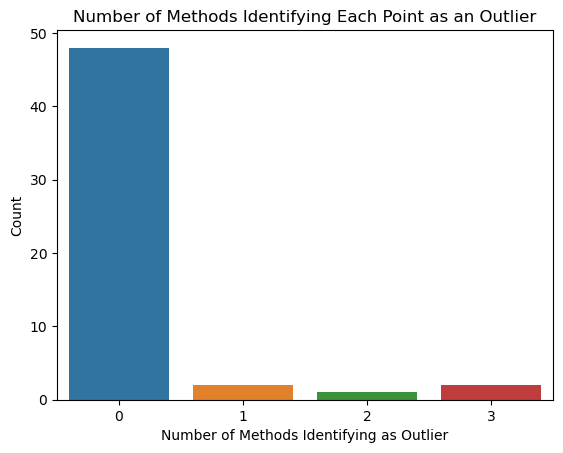

In [14]:
# ----------------------------------------------------------------
# Add Summation Column
# ----------------------------------------------------------------

outlier_columns = ['Outlier_LOF', 'Outlier_IForest', 'Outlier_OCSVM']
predictors['Outlier_Sum'] = predictors[outlier_columns].apply(lambda row: sum([1 for val in row if val == -1]), axis=1)

# Displaying the first few rows of the DataFrame
print(predictors.head())

# Optional: Plotting the results
sns.countplot(x='Outlier_Sum', data=predictors)
plt.title('Number of Methods Identifying Each Point as an Outlier')
plt.xlabel('Number of Methods Identifying as Outlier')
plt.ylabel('Count')
plt.show()

In [15]:
predictors['Outlier_Sum'].value_counts()

# the total number of outliers detected by all three methods is 3.77% of the data.

0    48
3     2
1     2
2     1
Name: Outlier_Sum, dtype: int64

In [16]:
# sample vizualization

import plotly.express as px

# Using three features for the 3D plot
features_to_plot = ['346', '790','2499']

predictors['Outlier_Sum_Cat'] = pd.Categorical(predictors['Outlier_Sum'])

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(predictors, x='346', y='790', z='2499', color='Outlier_Sum_Cat', 
                    title='3D Scatter Plot of 3 bands with Outliers Highlighted',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [17]:
predictors.head()

,339,341,342,344,345,346,348,349,351,352,...,2507,2509,2511,2514,2516,Outlier_LOF,Outlier_IForest,Outlier_OCSVM,Outlier_Sum,Outlier_Sum_Cat
0,0.1481,0.1818,0.1748,0.1486,0.1045,0.0782,0.0904,0.0830,0.1101,0.1168,...,0.0360,0.0346,0.0320,0.0328,0.0344,1,1,1,0,0
1,0.1422,0.1360,0.1384,0.1283,0.1103,0.0967,0.1014,0.1040,0.0934,0.0819,...,0.0563,0.0554,0.0533,0.0547,0.0528,1,1,1,0,0
2,0.0978,0.0920,0.1038,0.0981,0.0793,0.0613,0.0477,0.0520,0.0545,0.0698,...,0.0293,0.0311,0.0284,0.0279,0.0294,1,1,1,0,0
3,0.1422,0.1360,0.1538,0.1283,0.1241,0.1161,0.1074,0.0876,0.0831,0.0722,...,0.0428,0.0450,0.0486,0.0425,0.0479,1,1,1,0,0
4,0.1333,0.1280,0.1307,0.0981,0.1034,0.0838,0.0776,0.0767,0.0779,0.0722,...,0.0360,0.0369,0.0344,0.0340,0.0405,1,1,1,0,0


In [20]:
# Extract indices of the outliers detected by all three methods
all_outliers_indices = predictors[predictors['Outlier_Sum'] == 3].index

# Exclude outliers from the DataFrame
predictors_without_outliers = predictors.drop(all_outliers_indices)

# Display the DataFrame without outliers
print(predictors_without_outliers)

       339     341     342     344     345     346     348     349     351  \
0   0.1481  0.1818  0.1748  0.1486  0.1045  0.0782  0.0904  0.0830  0.1101   
1   0.1422  0.1360  0.1384  0.1283  0.1103  0.0967  0.1014  0.1040  0.0934   
2   0.0978  0.0920  0.1038  0.0981  0.0793  0.0613  0.0477  0.0520  0.0545   
3   0.1422  0.1360  0.1538  0.1283  0.1241  0.1161  0.1074  0.0876  0.0831   
4   0.1333  0.1280  0.1307  0.0981  0.1034  0.0838  0.0776  0.0767  0.0779   
5   0.0889  0.1040  0.1000  0.1056  0.0896  0.0839  0.0836  0.0877  0.0831   
6   0.0978  0.0800  0.0769  0.0604  0.0552  0.0967  0.0776  0.0712  0.0779   
8   0.1052  0.0733  0.1128  0.1072  0.0985  0.1134  0.1044  0.0855  0.0549   
9   0.1626  0.1466  0.1476  0.1072  0.1062  0.1064  0.0718  0.1099  0.0989   
10  0.1486  0.1351  0.1282  0.1176  0.1505  0.1414  0.1603  0.1304  0.1056   
11  0.1516  0.1070  0.1015  0.1009  0.1135  0.0800  0.0809  0.0574  0.0536   
12  0.1070  0.0981  0.0761  0.0931  0.1064  0.0666  0.0560  0.06

In [21]:
# convert to the original format of 'predictors'
predictors_without_outliers = predictors_without_outliers.drop(columns = ['Outlier_LOF', 'Outlier_IForest', 'Outlier_OCSVM','Outlier_Sum', 'Outlier_Sum_Cat'])

predictors_without_outliers

,339,341,342,344,345,346,348,349,351,352,...,2497,2499,2501,2503,2505,2507,2509,2511,2514,2516
0,0.1481,0.1818,0.1748,0.1486,0.1045,0.0782,0.0904,0.0830,0.1101,0.1168,...,0.0344,0.0332,0.0347,0.0323,0.0308,0.0360,0.0346,0.0320,0.0328,0.0344
1,0.1422,0.1360,0.1384,0.1283,0.1103,0.0967,0.1014,0.1040,0.0934,0.0819,...,0.0557,0.0560,0.0589,0.0560,0.0551,0.0563,0.0554,0.0533,0.0547,0.0528
2,0.0978,0.0920,0.1038,0.0981,0.0793,0.0613,0.0477,0.0520,0.0545,0.0698,...,0.0314,0.0280,0.0252,0.0269,0.0275,0.0293,0.0311,0.0284,0.0279,0.0294
3,0.1422,0.1360,0.1538,0.1283,0.1241,0.1161,0.1074,0.0876,0.0831,0.0722,...,0.0466,0.0456,0.0473,0.0484,0.0452,0.0428,0.0450,0.0486,0.0425,0.0479
4,0.1333,0.1280,0.1307,0.0981,0.1034,0.0838,0.0776,0.0767,0.0779,0.0722,...,0.0375,0.0373,0.0347,0.0323,0.0330,0.0360,0.0369,0.0344,0.0340,0.0405
5,0.0889,0.1040,0.1000,0.1056,0.0896,0.0839,0.0836,0.0877,0.0831,0.0723,...,0.0344,0.0394,0.0368,0.0344,0.0330,0.0349,0.0334,0.0332,0.0340,0.0356
6,0.0978,0.0800,0.0769,0.0604,0.0552,0.0967,0.0776,0.0712,0.0779,0.0482,...,0.0233,0.0238,0.0252,0.0226,0.0242,0.0225,0.0208,0.0225,0.0231,0.0245
8,0.1052,0.0733,0.1128,0.1072,0.0985,0.1134,0.1044,0.0855,0.0549,0.0608,...,0.0293,0.0278,0.0261,0.0245,0.0251,0.0232,0.0225,0.0220,0.0201,0.0292
9,0.1626,0.1466,0.1476,0.1072,0.1062,0.1064,0.0718,0.1099,0.0989,0.0913,...,0.0346,0.0353,0.0347,0.0345,0.0365,0.0360,0.0320,0.0317,0.0314,0.0342
10,0.1486,0.1351,0.1282,0.1176,0.1505,0.1414,0.1603,0.1304,0.1056,0.0763,...,0.0415,0.0382,0.0387,0.0395,0.0395,0.0393,0.0401,0.0400,0.0373,0.0350


In [28]:
# Merge predictors_without_outliers DF with the 'target' column from the original training DF
training_df_without_outliers = predictors_without_outliers.merge(target, left_index=True, right_index=True)


training_df_without_outliers

,339,341,342,344,345,346,348,349,351,352,...,2499,2501,2503,2505,2507,2509,2511,2514,2516,Water Potential (Mpa)
0,0.1481,0.1818,0.1748,0.1486,0.1045,0.0782,0.0904,0.0830,0.1101,0.1168,...,0.0332,0.0347,0.0323,0.0308,0.0360,0.0346,0.0320,0.0328,0.0344,-0.089632
1,0.1422,0.1360,0.1384,0.1283,0.1103,0.0967,0.1014,0.1040,0.0934,0.0819,...,0.0560,0.0589,0.0560,0.0551,0.0563,0.0554,0.0533,0.0547,0.0528,-0.148237
2,0.0978,0.0920,0.1038,0.0981,0.0793,0.0613,0.0477,0.0520,0.0545,0.0698,...,0.0280,0.0252,0.0269,0.0275,0.0293,0.0311,0.0284,0.0279,0.0294,-0.128243
3,0.1422,0.1360,0.1538,0.1283,0.1241,0.1161,0.1074,0.0876,0.0831,0.0722,...,0.0456,0.0473,0.0484,0.0452,0.0428,0.0450,0.0486,0.0425,0.0479,-0.164785
4,0.1333,0.1280,0.1307,0.0981,0.1034,0.0838,0.0776,0.0767,0.0779,0.0722,...,0.0373,0.0347,0.0323,0.0330,0.0360,0.0369,0.0344,0.0340,0.0405,-0.326122
5,0.0889,0.1040,0.1000,0.1056,0.0896,0.0839,0.0836,0.0877,0.0831,0.0723,...,0.0394,0.0368,0.0344,0.0330,0.0349,0.0334,0.0332,0.0340,0.0356,-0.147548
6,0.0978,0.0800,0.0769,0.0604,0.0552,0.0967,0.0776,0.0712,0.0779,0.0482,...,0.0238,0.0252,0.0226,0.0242,0.0225,0.0208,0.0225,0.0231,0.0245,-0.252348
8,0.1052,0.0733,0.1128,0.1072,0.0985,0.1134,0.1044,0.0855,0.0549,0.0608,...,0.0278,0.0261,0.0245,0.0251,0.0232,0.0225,0.0220,0.0201,0.0292,-0.474359
9,0.1626,0.1466,0.1476,0.1072,0.1062,0.1064,0.0718,0.1099,0.0989,0.0913,...,0.0353,0.0347,0.0345,0.0365,0.0360,0.0320,0.0317,0.0314,0.0342,-0.649486
10,0.1486,0.1351,0.1282,0.1176,0.1505,0.1414,0.1603,0.1304,0.1056,0.0763,...,0.0382,0.0387,0.0395,0.0395,0.0393,0.0401,0.0400,0.0373,0.0350,-0.408859


In [30]:
# save file
training_df_without_outliers.to_excel('drought_training_df_without_outliers.xlsx', index = False)